In [1]:
import os
import numpy as np
from numpy import sqrt, mean, absolute
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import pointbiserialr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

print("Successful Import")

Successful Import


In [4]:
os.chdir('C:/Users/willi/Documents/Data Science Practice Projects/Fordham Projects/CAPSTONE/')

df = pd.read_csv(r'NYC REAL ESTATE/nyc_full_clean_2.csv')
df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,DATE,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE
0,4,11379,1,2075,1160,1940,10.0,737493,2,47.000000,8125.00
1,4,11367,1,2642,1296,1950,770000.0,737493,2,47.000000,8125.00
2,4,11412,1,2000,1200,1935,530000.0,737493,2,47.000000,8125.00
3,4,11367,1,2080,1530,1945,715000.0,737493,2,47.000000,8125.00
4,4,11373,1,1610,1448,1925,898000.0,737493,2,47.000000,8125.00
...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,1,2142,882,1935,440000.0,737790,44,1143.857143,26.19
3438,1,10021,1,4017,11281,1929,30000000.0,737790,44,464.142857,12.93
3439,1,10128,1,1812,3993,1899,6375000.0,737790,44,464.142857,12.93
3440,5,10314,1,3168,1120,1963,535000.0,737790,44,403.428571,35.70


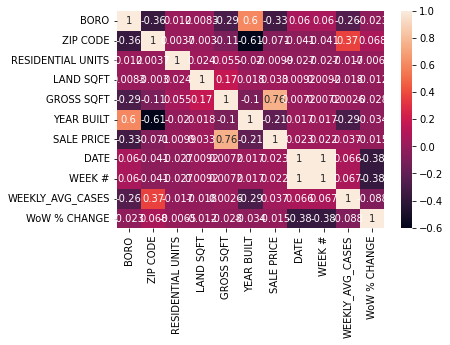

In [5]:
# Plot Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
# Convert dates from ordinal to Gregorian datetime format.
df['DATE'] = df['DATE'].map(dt.date.fromordinal)
df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,DATE,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE
0,4,11379,1,2075,1160,1940,10.0,2020-03-09,2,47.000000,8125.00
1,4,11367,1,2642,1296,1950,770000.0,2020-03-09,2,47.000000,8125.00
2,4,11412,1,2000,1200,1935,530000.0,2020-03-09,2,47.000000,8125.00
3,4,11367,1,2080,1530,1945,715000.0,2020-03-09,2,47.000000,8125.00
4,4,11373,1,1610,1448,1925,898000.0,2020-03-09,2,47.000000,8125.00
...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,1,2142,882,1935,440000.0,2020-12-31,44,1143.857143,26.19
3438,1,10021,1,4017,11281,1929,30000000.0,2020-12-31,44,464.142857,12.93
3439,1,10128,1,1812,3993,1899,6375000.0,2020-12-31,44,464.142857,12.93
3440,5,10314,1,3168,1120,1963,535000.0,2020-12-31,44,403.428571,35.70


In [7]:
# Only month is needed from date
df['DATE'] = pd.DatetimeIndex(df['DATE']).month
df = df.rename(columns = {'DATE':'MONTH'})
df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,MONTH,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE
0,4,11379,1,2075,1160,1940,10.0,3,2,47.000000,8125.00
1,4,11367,1,2642,1296,1950,770000.0,3,2,47.000000,8125.00
2,4,11412,1,2000,1200,1935,530000.0,3,2,47.000000,8125.00
3,4,11367,1,2080,1530,1945,715000.0,3,2,47.000000,8125.00
4,4,11373,1,1610,1448,1925,898000.0,3,2,47.000000,8125.00
...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,1,2142,882,1935,440000.0,12,44,1143.857143,26.19
3438,1,10021,1,4017,11281,1929,30000000.0,12,44,464.142857,12.93
3439,1,10128,1,1812,3993,1899,6375000.0,12,44,464.142857,12.93
3440,5,10314,1,3168,1120,1963,535000.0,12,44,403.428571,35.70


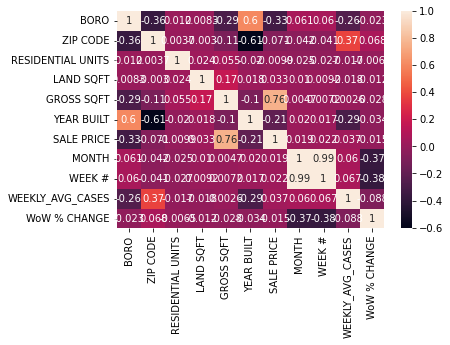

In [8]:
# Replot correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
# Defines function that utilizes the month value to create a season class, <1,2,3,4> corresponding to Winter, Spring, Summer, Autumn; respectfully.
def seasonal(month):
    if month in [12,1,2]:
        return 1
    if month in [3,4,5]:
        return 2
    if month in [6,7,8]:
        return 3
    if month in [9,10,11]:
        return 4

<Axes: xlabel='WoW % CHANGE', ylabel='Density'>

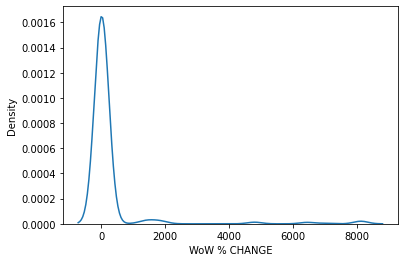

In [11]:
# Density plot to visualize distribution of Weekly % Change of COVID cases.
sns.kdeplot(data=df, x="WoW % CHANGE")

In [12]:
df[['WoW % CHANGE']].describe()

,WoW % CHANGE
count,3442.000000
mean,241.648788
std,1153.540583
min,-47.850000
25%,-8.160000
50%,10.880000
75%,31.800000
max,8125.000000


In [13]:
# Function to normalize the WoW % Change by converting rates into class categories 
def rate_description(val):
    if val <= -10.0:
        return -2 # Significantly Decreasing
    if val <= -1.0 and val > -10.0:
        return -1 # Decreasing
    if val > -1.0 and val < 1.0:
        return 0 # Neutral or Modest Changes
    if val >= 1.0 and val < 10.0:
        return 1 # Increasing
    if val >= -10.0:
        return 2 # Significantly Increasing       

In [14]:
# Create new attribute 'SEASON' by applying function 'seasonal' on attribute 'MONTH'.
df['SEASON'] = df['MONTH'].apply(seasonal)
df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,MONTH,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE,SEASON
0,4,11379,1,2075,1160,1940,10.0,3,2,47.000000,8125.00,2
1,4,11367,1,2642,1296,1950,770000.0,3,2,47.000000,8125.00,2
2,4,11412,1,2000,1200,1935,530000.0,3,2,47.000000,8125.00,2
3,4,11367,1,2080,1530,1945,715000.0,3,2,47.000000,8125.00,2
4,4,11373,1,1610,1448,1925,898000.0,3,2,47.000000,8125.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,1,2142,882,1935,440000.0,12,44,1143.857143,26.19,1
3438,1,10021,1,4017,11281,1929,30000000.0,12,44,464.142857,12.93,1
3439,1,10128,1,1812,3993,1899,6375000.0,12,44,464.142857,12.93,1
3440,5,10314,1,3168,1120,1963,535000.0,12,44,403.428571,35.70,1


In [15]:
# Create new attribute 'STATE_OF_COVID' by applying function 'rate_description' on attribute 'WoW % CHANGE'.
df['STATE_OF_COVID'] = df['WoW % CHANGE'].apply(rate_description)
df

,BORO,ZIP CODE,RESIDENTIAL UNITS,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,MONTH,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE,SEASON,STATE_OF_COVID
0,4,11379,1,2075,1160,1940,10.0,3,2,47.000000,8125.00,2,2
1,4,11367,1,2642,1296,1950,770000.0,3,2,47.000000,8125.00,2,2
2,4,11412,1,2000,1200,1935,530000.0,3,2,47.000000,8125.00,2,2
3,4,11367,1,2080,1530,1945,715000.0,3,2,47.000000,8125.00,2,2
4,4,11373,1,1610,1448,1925,898000.0,3,2,47.000000,8125.00,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,1,2142,882,1935,440000.0,12,44,1143.857143,26.19,1,2
3438,1,10021,1,4017,11281,1929,30000000.0,12,44,464.142857,12.93,1,2
3439,1,10128,1,1812,3993,1899,6375000.0,12,44,464.142857,12.93,1,2
3440,5,10314,1,3168,1120,1963,535000.0,12,44,403.428571,35.70,1,2


In [16]:
df = df.drop(columns = ['RESIDENTIAL UNITS','MONTH'])
df

,BORO,ZIP CODE,LAND SQFT,GROSS SQFT,YEAR BUILT,SALE PRICE,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE,SEASON,STATE_OF_COVID
0,4,11379,2075,1160,1940,10.0,2,47.000000,8125.00,2,2
1,4,11367,2642,1296,1950,770000.0,2,47.000000,8125.00,2,2
2,4,11412,2000,1200,1935,530000.0,2,47.000000,8125.00,2,2
3,4,11367,2080,1530,1945,715000.0,2,47.000000,8125.00,2,2
4,4,11373,1610,1448,1925,898000.0,2,47.000000,8125.00,2,2
...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,2142,882,1935,440000.0,44,1143.857143,26.19,1,2
3438,1,10021,4017,11281,1929,30000000.0,44,464.142857,12.93,1,2
3439,1,10128,1812,3993,1899,6375000.0,44,464.142857,12.93,1,2
3440,5,10314,3168,1120,1963,535000.0,44,403.428571,35.70,1,2


In [17]:
column_names = ['BORO', 'ZIP CODE', 'LAND SQFT','GROSS SQFT', 'YEAR BUILT', 'WEEK #', 'WEEKLY_AVG_CASES','WoW % CHANGE','SEASON', 'STATE_OF_COVID', 'SALE PRICE']
df = df.reindex(columns=column_names)
df

,BORO,ZIP CODE,LAND SQFT,GROSS SQFT,YEAR BUILT,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE,SEASON,STATE_OF_COVID,SALE PRICE
0,4,11379,2075,1160,1940,2,47.000000,8125.00,2,2,10.0
1,4,11367,2642,1296,1950,2,47.000000,8125.00,2,2,770000.0
2,4,11412,2000,1200,1935,2,47.000000,8125.00,2,2,530000.0
3,4,11367,2080,1530,1945,2,47.000000,8125.00,2,2,715000.0
4,4,11373,1610,1448,1925,2,47.000000,8125.00,2,2,898000.0
...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,2142,882,1935,44,1143.857143,26.19,1,2,440000.0
3438,1,10021,4017,11281,1929,44,464.142857,12.93,1,2,30000000.0
3439,1,10128,1812,3993,1899,44,464.142857,12.93,1,2,6375000.0
3440,5,10314,3168,1120,1963,44,403.428571,35.70,1,2,535000.0


<Axes: >

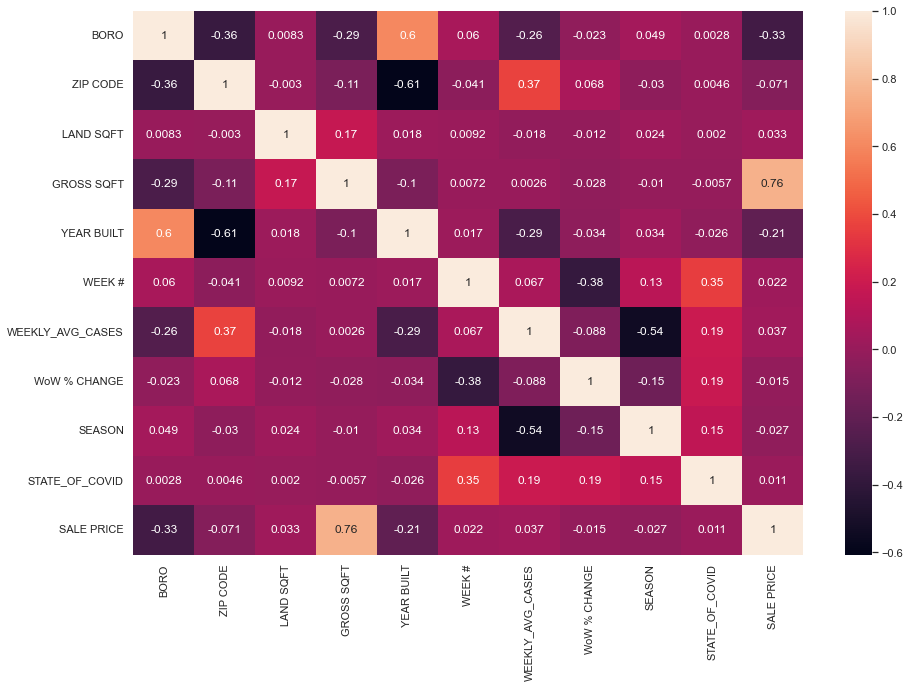

In [18]:
corr_matrix_2 = df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix_2, annot=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442 entries, 0 to 3441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BORO              3442 non-null   int64  
 1   ZIP CODE          3442 non-null   int64  
 2   LAND SQFT         3442 non-null   int64  
 3   GROSS SQFT        3442 non-null   int64  
 4   YEAR BUILT        3442 non-null   int64  
 5   WEEK #            3442 non-null   int64  
 6   WEEKLY_AVG_CASES  3442 non-null   float64
 7   WoW % CHANGE      3442 non-null   float64
 8   SEASON            3442 non-null   int64  
 9   STATE_OF_COVID    3442 non-null   int64  
 10  SALE PRICE        3442 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 295.9 KB


<Axes: xlabel='STATE_OF_COVID', ylabel='Density'>

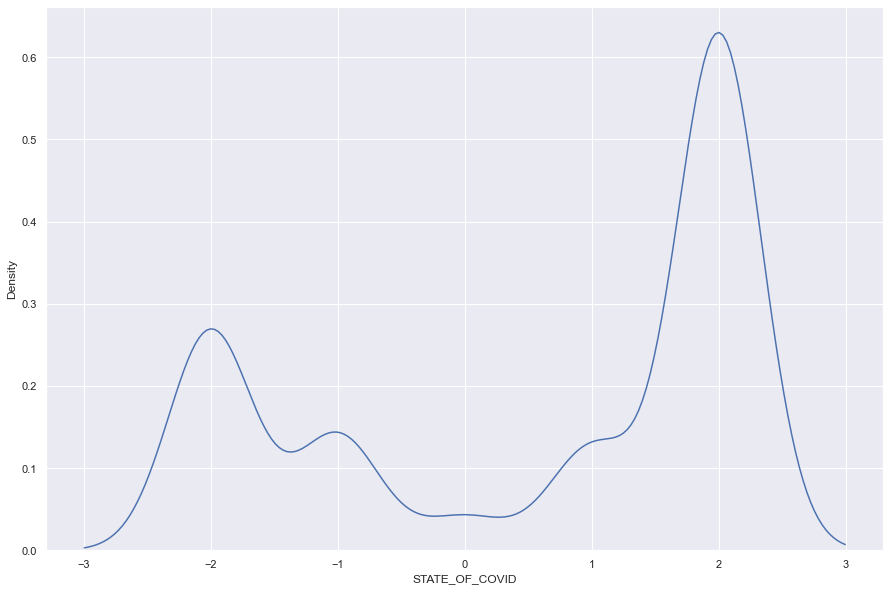

In [20]:
# Density plot to visualize distribution of 'STATE_OF_COVID' attribute values.
sns.kdeplot(data=df, x="STATE_OF_COVID")

<Axes: xlabel='SALE PRICE', ylabel='Density'>

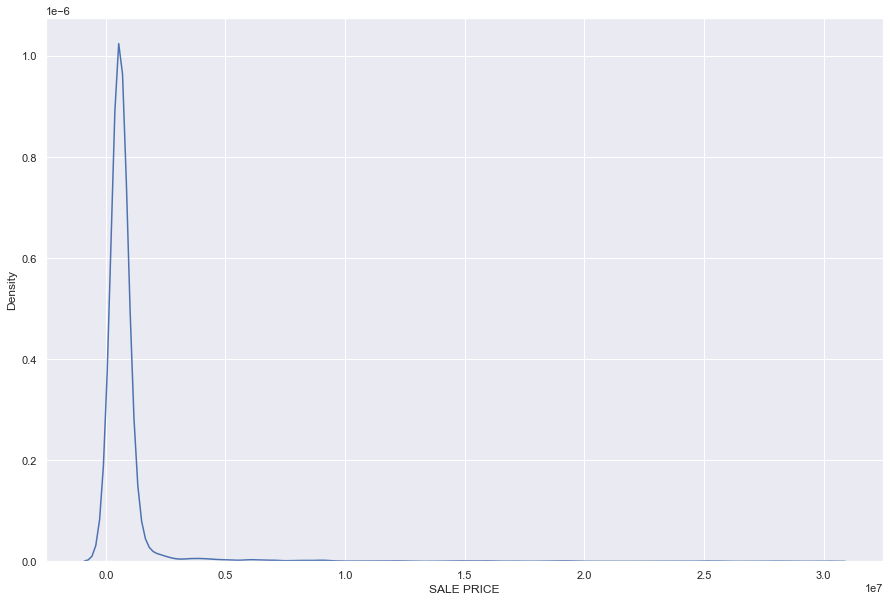

In [21]:
# Denisty plot to visualize distribution of 'SALE PRICE'. X-Axis is in interval of millions.
sns.kdeplot(data=df, x="SALE PRICE")

# Split Data

In [22]:
# List containing all predictor variables
learn_vars = ['BORO', 'ZIP CODE', 'LAND SQFT','GROSS SQFT', 'YEAR BUILT', 'WEEK #', 'WEEKLY_AVG_CASES','SEASON', 'STATE_OF_COVID'] 

In [23]:
X = df[learn_vars]
y = df['SALE PRICE']
print(X.shape, y.shape, '\n')

(3442, 9) (3442,) 



In [24]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape, y_train.shape ,'\n')
print(X_test.shape, y_test.shape ,'\n')

(2753, 9) (2753,) 

(689, 9) (689,) 



In [26]:
scaler = MinMaxScaler()

In [27]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

y_train_s = np.array(y_train).reshape(-1,1)
y_train_s = scaler.fit_transform(y_train_s)
y_train_s = y_train_s.flatten()

y_test_s = np.array(y_test).reshape(-1,1)
y_test_s = scaler.transform(y_test_s)
y_test_s = y_test_s.flatten()

In [28]:
print(X_train_s.shape, y_train_s.shape ,'\n')
print(X_test_s.shape, y_test_s.shape ,'\n')

(2753, 9) (2753,) 

(689, 9) (689,) 



# Linear Regression

#### SCALED

In [40]:
model2 = LinearRegression()
model2.fit(X_train_s, y_train_s)

LinearRegression()

In [41]:
# Prediction
Y_pred_s = model2.predict(X_test_s)

In [42]:
print('========== LR Results Evaluation ==========')
mae_s = metrics.mean_absolute_error(y_test_s, Y_pred_s)
print('MAE:', mae_s)
mse_s = metrics.mean_squared_error(y_test_s, Y_pred_s)
print('MSE:', mse_s)
print('RMSE:', np.sqrt(mse_s))
r2_s = metrics.r2_score(y_test_s, Y_pred_s)
print('R-Squared Score: ', r2_s)
print('===========================================')

========== LR Results Evaluation ==========
MAE: 0.016793851734278904
MSE: 0.0013304279470823194
RMSE: 0.03647503183113511
R-Squared Score:  0.6064214565119096


In [43]:
# Repeat with k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model2, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model2, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== LR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_s)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== LR Results Evaluation (with Cross Validation) ==========
MAE: 0.0161
RMSE: 0.0311
R-Squared Score:  0.6064


Text(0.5, 1.0, 'Actual vs Predicted Sale Values (Linear Regression)')

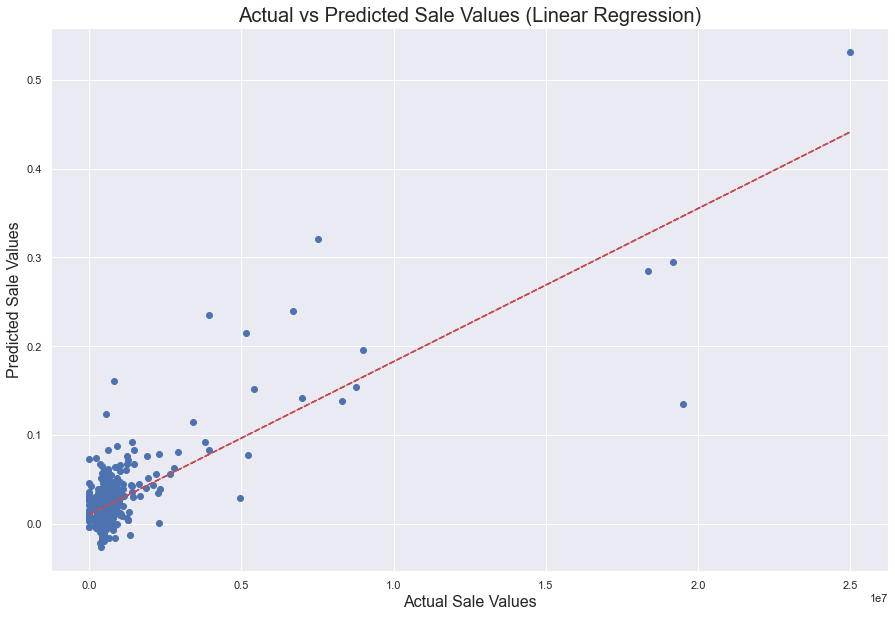

In [44]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,Y_pred_s)
m, b = np.polyfit(y_test, Y_pred_s, 1)
plt.plot(y_test, m*y_test + b, "r--")
plt.xlabel('Actual Sale Values', fontsize = 16)
plt.ylabel('Predicted Sale Values', fontsize = 16)
plt.title('Actual vs Predicted Sale Values (Linear Regression)', fontsize = 20)

# Random Forest Regression

In [45]:
rf = RandomForestRegressor(random_state = 42)

#### SCALED

In [46]:
rfModel = rf.fit(X_train_s, y_train_s)

In [47]:
Y_pred_rf = rfModel.predict(X_test_s)

In [ ]:
print('========== RFR Results Evaluation ==========')
mae_rf = metrics.mean_absolute_error(y_test_s, Y_pred_rf)
print('MAE:', mae_rf)
mse_rf = metrics.mean_squared_error(y_test_s, Y_pred_rf)
print('MSE:', mse_rf)
print('RMSE:', np.sqrt(mse_rf))
r2_rf = metrics.r2_score(y_test_s, Y_pred_rf)
print('R-Squared Score: ', r2_rf)
print('============================================')

In [48]:
# Repeat with k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(rfModel, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(rfModel, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== RFR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_rf)
print('R-Squared Score: ', "{:.4f}".format(r2_s)) # R2 Score too low 0.62
print('====================================================================')

========== RFR Results Evaluation (with Cross Validation) ==========
MAE: 0.0074
RMSE: 0.0252
R-Squared Score:  0.7579


Text(0.5, 1.0, 'Actual vs Predicted Sale Values (Random Forest Regression)')

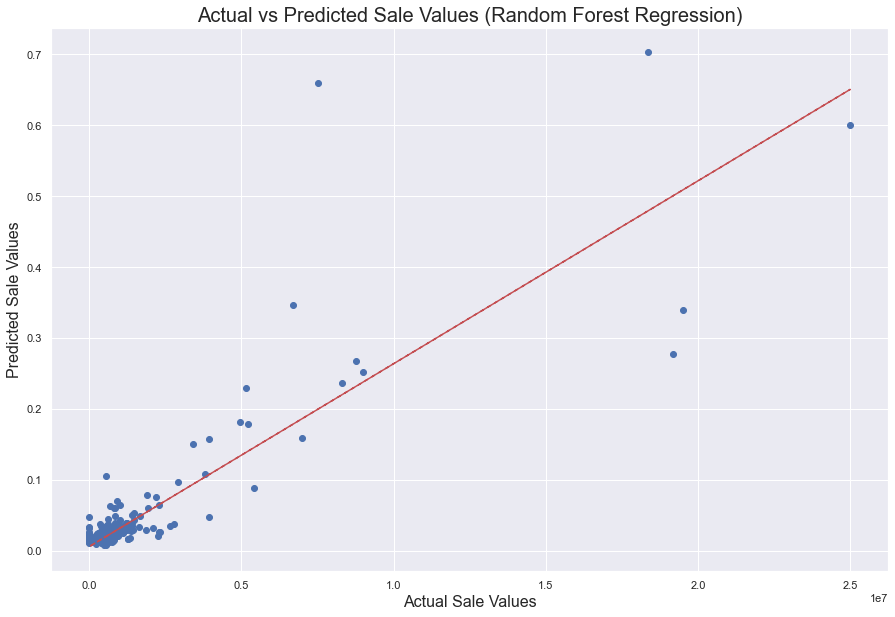

In [49]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,Y_pred_rf)
m, b = np.polyfit(y_test, Y_pred_rf, 1)
plt.plot(y_test, m*y_test + b, "r--")
plt.xlabel('Actual Sale Values', fontsize = 16)
plt.ylabel('Predicted Sale Values', fontsize = 16)
plt.title('Actual vs Predicted Sale Values (Random Forest Regression)', fontsize = 20)

# Support Vector Regression

In [50]:
supp_vec = SVR(kernel = "poly")

In [51]:
svrModel = supp_vec.fit(X_train_s, y_train_s)

In [52]:
Y_pred_svr = svrModel.predict(X_test_s)

In [53]:
print('========== SVR Results Evaluation ==========')
mae_svr = metrics.mean_absolute_error(y_test_s, Y_pred_svr)
print('MAE:', mae_svr)
mse_svr = metrics.mean_squared_error(y_test_s, Y_pred_svr)
print('MSE:', mse_svr)
print('RMSE:', np.sqrt(mse_svr))
r2_svr = metrics.r2_score(y_test_s, Y_pred_svr)
print('R-Squared Score: ', r2_svr)
print('============================================')

========== SVR Results Evaluation ==========
MAE: 0.04270367739791136
MSE: 0.002899618104329597
RMSE: 0.053848102142318784
R-Squared Score:  0.14221023943724487


In [54]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(svrModel, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(svrModel, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== SVR Results Evaluation (with Cross-Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_svr)
print('R-Squared Score: ', "{:.4f}".format(r2_s)) # R2 Score too low 0.62
print('====================================================================')

========== SVR Results Evaluation (with Cross-Validation) ==========
MAE: 0.0444
RMSE: 0.0554
R-Squared Score:  0.1422


Text(0.5, 1.0, 'Actual vs Predicted Sale Values (Support Vector Regression)')

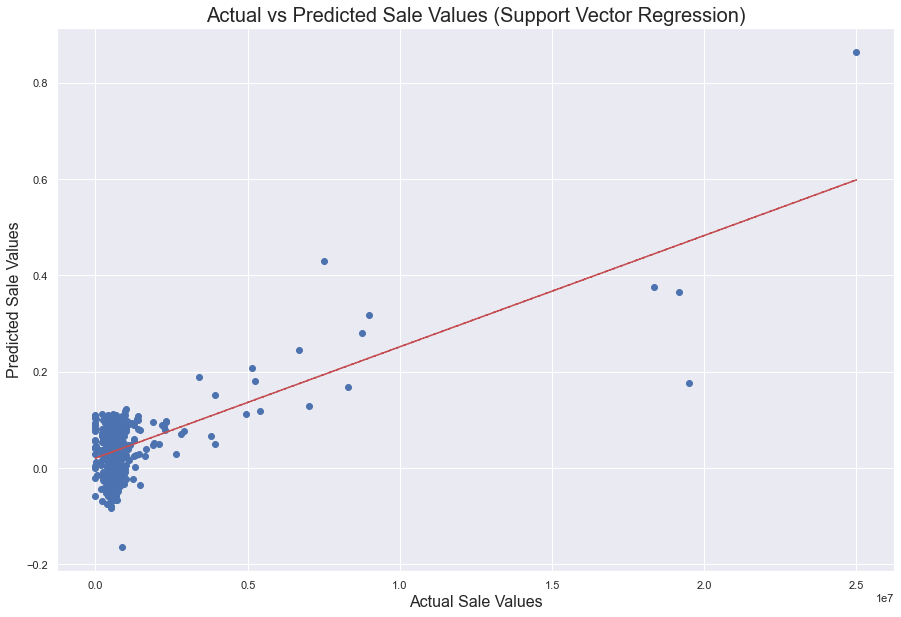

In [55]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,Y_pred_svr)
m, b = np.polyfit(y_test, Y_pred_svr, 1)
plt.plot(y_test, m*y_test + b, "r--")
plt.xlabel('Actual Sale Values', fontsize = 16)
plt.ylabel('Predicted Sale Values', fontsize = 16)
plt.title('Actual vs Predicted Sale Values (Support Vector Regression)', fontsize = 20)

# Gradient Boosting Machine

In [56]:
gbr = GradientBoostingRegressor()

In [57]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gbr, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -0.008 (0.002)


In [58]:
gbrModel = gbr.fit(X_train_s, y_train_s)

In [59]:
Y_pred_gbr = gbrModel.predict(X_test_s)

In [60]:
print('========== GBR Results Evaluation ==========')
mae_gbr = metrics.mean_absolute_error(y_test_s, Y_pred_gbr)
print('MAE:', mae_gbr)
mse_gbr = metrics.mean_squared_error(y_test_s, Y_pred_gbr)
print('MSE:', mse_gbr)
print('RMSE:', np.sqrt(mse_gbr))
r2_gbr = metrics.r2_score(y_test_s, Y_pred_gbr)
print('R-Squared Score: ', r2_gbr)
print('============================================')

========== GBR Results Evaluation ==========
MAE: 0.007969067099618634
MSE: 0.0007527811171938809
RMSE: 0.02743685691171423
R-Squared Score:  0.7773058688971053


In [61]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(gbrModel, X_train_s, y_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(gbrModel, X_train_s, y_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== GBR Results Evaluation (with Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y_test_s, Y_pred_gbr)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('====================================================================')

========== GBR Results Evaluation (with Cross Validation) ==========
MAE: 0.0076
RMSE: 0.0258
R-Squared Score:  0.7773


Text(0.5, 1.0, 'Actual vs Predicted Sale Values (Gradient Boost Regression)')

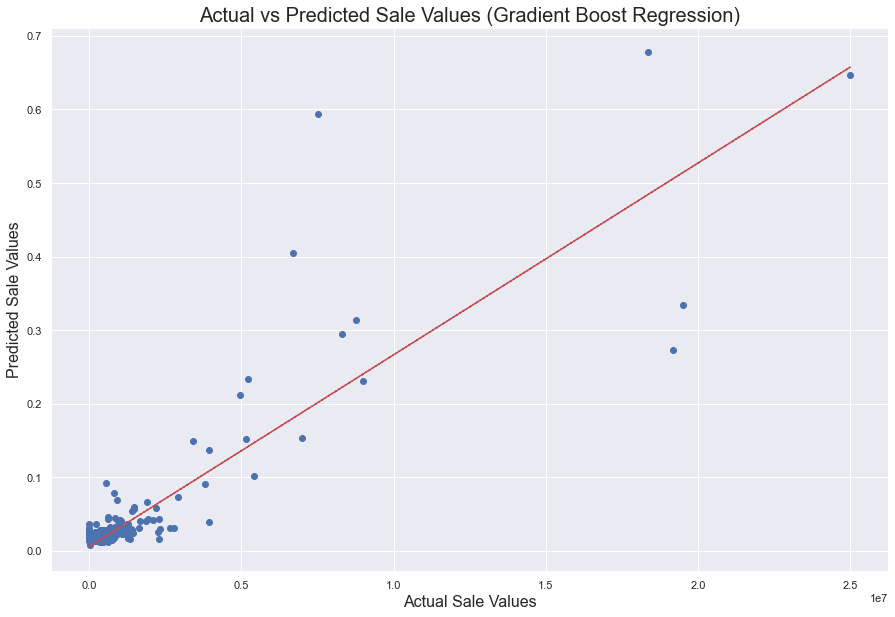

In [62]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,Y_pred_gbr)
m, b = np.polyfit(y_test, Y_pred_gbr, 1)
plt.plot(y_test, m*y_test + b, "r--")
plt.xlabel('Actual Sale Values', fontsize = 16)
plt.ylabel('Predicted Sale Values', fontsize = 16)
plt.title('Actual vs Predicted Sale Values (Gradient Boost Regression)', fontsize = 20)

# Feature Selection

In [ ]:
#Export DataFrame to CSV for R
#df.to_csv('final.csv', index=False)

In [70]:
df

,BORO,ZIP CODE,LAND SQFT,GROSS SQFT,YEAR BUILT,WEEK #,WEEKLY_AVG_CASES,WoW % CHANGE,SEASON,STATE_OF_COVID,SALE PRICE
0,4,11379,2075,1160,1940,2,47.000000,8125.00,2,2,10.0
1,4,11367,2642,1296,1950,2,47.000000,8125.00,2,2,770000.0
2,4,11412,2000,1200,1935,2,47.000000,8125.00,2,2,530000.0
3,4,11367,2080,1530,1945,2,47.000000,8125.00,2,2,715000.0
4,4,11373,1610,1448,1925,2,47.000000,8125.00,2,2,898000.0
...,...,...,...,...,...,...,...,...,...,...,...
3437,4,11411,2142,882,1935,44,1143.857143,26.19,1,2,440000.0
3438,1,10021,4017,11281,1929,44,464.142857,12.93,1,2,30000000.0
3439,1,10128,1812,3993,1899,44,464.142857,12.93,1,2,6375000.0
3440,5,10314,3168,1120,1963,44,403.428571,35.70,1,2,535000.0


In [71]:
col_names_1 = df.columns
params1 = []
correlation1 = []
abs_correlation1 = []
for col in col_names_1:
    if col != "SALE PRICE":
        if len(df[col].unique()) <= 2:
            corr = spearmanr(df['SALE PRICE'], df[col])[0]
        else:
            corr = pointbiserialr(df['SALE PRICE'], df[col])[0]
        params1.append(col)
        correlation1.append(corr)
        abs_correlation1.append(abs(corr))
params_df1 = pd.DataFrame({'correlation':correlation1, 'parameter': params1, 'abs_correlation': abs_correlation1})
params_df1 = params_df1.sort_values(by = ['abs_correlation'], ascending = False)
params_df1 = params_df1.set_index('parameter')
params_df1

,correlation,abs_correlation
parameter,,
GROSS SQFT,0.760311,0.760311
BORO,-0.326637,0.326637
YEAR BUILT,-0.205667,0.205667
ZIP CODE,-0.071396,0.071396
WEEKLY_AVG_CASES,0.037373,0.037373
LAND SQFT,0.032939,0.032939
SEASON,-0.026758,0.026758
WEEK #,0.022148,0.022148
WoW % CHANGE,-0.014958,0.014958


In [72]:
learn_vars_featselect = ['BORO','GROSS SQFT','YEAR BUILT','ZIP CODE','WEEKLY_AVG_CASES']
X2 = df[learn_vars_featselect]
y2 = df['SALE PRICE']
print(X2.shape, y2.shape, '\n')

(3442, 5) (3442,) 



In [73]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X2_train.shape, y2_train.shape ,'\n')
print(X2_test.shape, y2_test.shape ,'\n')

(2753, 5) (2753,) 

(689, 5) (689,) 



In [74]:
X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

y2_train_s = np.array(y2_train).reshape(-1,1)
y2_train_s = scaler.fit_transform(y2_train_s)
y2_train_s = y2_train_s.flatten()


y2_test_s = np.array(y2_test).reshape(-1,1)
y2_test_s = scaler.transform(y2_test_s)
y2_test_s = y2_test_s.flatten()

print(X2_train_s.shape, y2_train_s.shape ,'\n')
print(X2_test_s.shape, y2_test_s.shape ,'\n')

(2753, 5) (2753,) 

(689, 5) (689,) 



In [75]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X2_train_s, y2_train_s)

# Prediction
Y2_pred_s = model_lr_2.predict(X2_test_s)

print('========== LR Results Evaluation (with feature selection) ==========')
mae_s = metrics.mean_absolute_error(y2_test_s, Y2_pred_s)
print('MAE:', mae_s)
mse_s = metrics.mean_squared_error(y2_test_s, Y2_pred_s)
print('MSE:', mse_s)
print('RMSE:', np.sqrt(mse_s))
r2_s = metrics.r2_score(y2_test_s, Y2_pred_s)
print('R-Squared Score: ', r2_s)
print('====================================================================')

========== LR Results Evaluation (with feature selection) ==========
MAE: 0.01680190673529226
MSE: 0.001360440612993128
RMSE: 0.036884151244038786
R-Squared Score:  0.5975428536824399


In [76]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model_lr_2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_lr_2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [78]:

print('========== LR Results Evaluation (with feature selection & Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y2_pred_s)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('=======================================================================================')


========== LR Results Evaluation (with feature selection & Cross Validation) ==========
MAE: 0.0160
RMSE: 0.0313
R-Squared Score:  0.5975


In [79]:
model_rf2 = rf.fit(X2_train_s, y2_train_s)

# Prediction
Y_pred_rf2 = model_rf2.predict(X2_test_s)

print('========== RFR Results Evaluation (with feature selection) ==========')
mae_rf = metrics.mean_absolute_error(y2_test_s, Y_pred_rf2)
print('MAE:', mae_rf)
mse_rf = metrics.mean_squared_error(y2_test_s, Y_pred_rf2)
print('MSE:', mse_rf)
print('RMSE:', np.sqrt(mse_rf))
r2_rf = metrics.r2_score(y2_test_s, Y_pred_rf2)
print('R-Squared Score: ', r2_rf)
print('=====================================================================')


========== RFR Results Evaluation (with feature selection) ==========
MAE: 0.0077720915290929865
MSE: 0.0006923972501188353
RMSE: 0.026313442384432246
R-Squared Score:  0.7951691395129205


In [80]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(model_rf2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_rf2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== RFR Results Evaluation (with feature selection and Cross-Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y_pred_rf2)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('==========================================================================================')

========== RFR Results Evaluation (with feature selection and Cross-Validation) ==========
MAE: 0.0077
RMSE: 0.0271
R-Squared Score:  0.7952


In [81]:
svrModel2 = supp_vec.fit(X2_train_s, y2_train_s)
Y_pred_svr2 = svrModel2.predict(X2_test_s)

print('========== SVR Results Evaluation (with Feature Selection) ==========')
mae_svr = metrics.mean_absolute_error(y2_test_s, Y_pred_svr2)
print('MAE:', mae_svr)
mse_svr = metrics.mean_squared_error(y2_test_s, Y_pred_svr2)
print('MSE:', mse_svr)
print('RMSE:', np.sqrt(mse_svr))
r2_svr = metrics.r2_score(y2_test_s, Y_pred_svr2)
print('R-Squared Score: ', r2_svr)
print('=====================================================================')

========== SVR Results Evaluation (with Feature Selection) ==========
MAE: 0.04144915934858717
MSE: 0.0034565267955788143
RMSE: 0.058792234143454816
R-Squared Score:  -0.02253923988511297


In [82]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(svrModel2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(svrModel2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== SVR Results Evaluation (with Feature Selection and Cross-Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y_pred_svr)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('==========================================================================================')

========== SVR Results Evaluation (with Feature Selection and Cross-Validation) ==========
MAE: 0.0402
RMSE: 0.0531
R-Squared Score:  0.1422


In [83]:
gbrModel2 = gbr.fit(X2_train_s, y2_train_s)
Y_pred_gbr2 = gbrModel2.predict(X2_test_s)

In [84]:
print('========== GBR Results Evaluation (with Feature Reduction) ==========')
mae_gbr = metrics.mean_absolute_error(y2_test_s, Y_pred_gbr2)
print('MAE:', mae_gbr)
mse_gbr = metrics.mean_squared_error(y2_test_s, Y_pred_gbr2)
print('MSE:', mse_gbr)
print('RMSE:', np.sqrt(mse_gbr))
r2_gbr = metrics.r2_score(y2_test_s, Y_pred_gbr2)
print('R-Squared Score: ', r2_gbr)
print('=====================================================================')

========== GBR Results Evaluation (with Feature Reduction) ==========
MAE: 0.008014066704333515
MSE: 0.0007206346681326684
RMSE: 0.02684463946736235
R-Squared Score:  0.7868157056587073


In [85]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(gbrModel2, X2_train_s, y2_train_s, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(gbrModel2, X2_train_s, y2_train_s, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('========== GBR Results Evaluation (with Feature Selection and Cross Validation) ==========')
print("MAE:", "{:.4f}".format(mean(absolute(scores1))))
print("RMSE:", "{:.4f}".format(sqrt(mean(absolute(scores2)))))
r2_s = metrics.r2_score(y2_test_s, Y_pred_gbr2)
print('R-Squared Score: ', "{:.4f}".format(r2_s))
print('==========================================================================================')

========== GBR Results Evaluation (with Feature Selection and Cross Validation) ==========
MAE: 0.0080
RMSE: 0.0268
R-Squared Score:  0.7868


In [92]:
sampleTestdfX = X2_test[:5]
sampleTestdfX

,BORO,GROSS SQFT,YEAR BUILT,ZIP CODE,WEEKLY_AVG_CASES
790,5,1184,1970,10306,13.857143
51,4,1403,1920,11354,47.000000
1091,5,1825,1990,10308,22.857143
554,5,2104,2018,10306,35.428571
1814,5,1176,1975,10312,25.000000


In [93]:
area = [1748,1048,1152,1068,1638]
smpBoro = [5,2,5,5,1]
yr = [2018,1940,1986,1988,1899]
zipc = [10306,10469,10312,10306,10014]
weeklycase = [1417,1417,1417,1417,1417]

list_tuples = list(zip(area, smpBoro, yr, zipc, weeklycase)) 

sampleTestdfX = pd.DataFrame(list_tuples, columns=['GROSS SQFT', 'BORO', 'YEAR BUILT', 'ZIP CODE', 'WEEKLY_AVG_CASES'])
sampleTestdfX

,GROSS SQFT,BORO,YEAR BUILT,ZIP CODE,WEEKLY_AVG_CASES
0,1748,5,2018,10306,1417
1,1048,2,1940,10469,1417
2,1152,5,1986,10312,1417
3,1068,5,1988,10306,1417
4,1638,1,1899,10014,1417


In [94]:
model_rf_2 = rf.fit(X2_train, y2_train)
sampleRFpred_rf = model_rf_2.predict(sampleTestdfX)
sampleRFpred_rf

array([ 589038.42,  428479.1 ,  363360.45,  333122.68, 5108979.09])

In [95]:
gbrModel2 = gbr.fit(X2_train, y2_train)
sampleRFpred_gbr = gbrModel2.predict(sampleTestdfX)
sampleRFpred_gbr

array([ 497461.4197847 ,  443646.42175521,  391214.00455337,
        391214.00455337, 6831896.41453243])

In [96]:
sampleRFpred_rf = model_rf_2.predict(X2_test)
sampleRFpred_rf

array([  507318.88      ,   667677.02      ,   483860.6       ,
         682994.35      ,   537139.38      ,   568858.5       ,
         381947.85      ,   546114.8       ,   512287.85714286,
         664396.        ,   570084.2       ,   414234.48      ,
         588115.5       ,  5489706.2       ,   729054.5       ,
         748701.        ,   409904.35      ,   436403.75      ,
         541173.88      ,   481483.99      ,   787783.93      ,
         589277.5       ,   459955.6       ,   542078.86      ,
         414425.2       ,   605897.76      ,   750033.1       ,
         505280.9       ,   399491.60666667,   564455.94      ,
         695699.38      ,   434461.46      ,   804444.75      ,
         773132.83      ,   447315.68      ,   525735.        ,
        1312972.10333333,   443960.29      ,   388479.63      ,
         610219.16      ,   548996.37      ,   723097.01      ,
         788415.1       ,   838255.2       ,   440886.99      ,
         614846.32      ,   534659.76   

## Pre Covid

In [ ]:
learn_vars_3 = ['BORO','GROSS SQFT','YEAR BUILT','ZIP CODE']
X4 = df2[learn_vars_3]
y4 = df2['SALE PRICE']
print(X4.shape, y4.shape, '\n')

In [ ]:
sampleTestdfX2 = sampleTestdfX.drop(columns = ['WEEKLY_AVG_CASES']) 

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
print(X4_train.shape, y4_train.shape ,'\n')
print(X4_test.shape, y4_test.shape ,'\n')

In [ ]:
model_rf_4 = rf.fit(X4_train, y4_train)
sampleRFpred_rf = model_rf_4.predict(sampleTestdfX2)
sampleRFpred_rf

In [ ]:
df = pd.DataFrame(sampleRFpred_rf)
df= df.rename(columns = {0:'Post-Covid'})
df